---

#<font color = "orange"><center> **STORE SALES PREDICTION** </center>

---

#<font color = "orange">**Business Problem**:
###The sales of stores are given along with the items sold, outlets etc which affects the sales of the data. We have to predict the future sales of the stores based on the given data to help store owners in strategizing their business goals and come up with innovative techniques and ideas to attract customers and set realistic goals.

##<font color = "orange">importing libraries:

In [641]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [642]:
from google.colab import files
import io

##<font color = "orange">uploading the data:

In [643]:
one = files.upload()

Saving DS3_C6_S1_Regression_StoreSales_Data_Project.csv to DS3_C6_S1_Regression_StoreSales_Data_Project (3).csv


In [644]:
df = pd.read_csv(io.BytesIO(one["DS3_C6_S1_Regression_StoreSales_Data_Project.csv"]))

##<font color = "orange">reading two rows of the dataset:

In [645]:
df.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Medium,Tier 3,Grocery Store,283.6308
13411,FDP38,10.1,Low Fat,0.056207,Canned,51.3008,OUT019,1985,Small,Tier 1,Grocery Store,NaN


In [646]:
df = df.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"], axis = 1)

##<font color = "orange">checking the structure of data:

In [647]:
print("size: ",df.size)
print("shape: ",df.shape)

size:  127836
shape:  (14204, 9)


##<font color = "orange">summerising the data:</font>

In [648]:
print(df.describe().T)

                     count         mean          std        min         25%  \
Item_Weight        14204.0    12.793380     4.651716   4.555000    8.710000   
Item_Visibility    14204.0     0.070301     0.048621   0.003575    0.033143   
Item_MRP           14204.0   141.004977    62.086938  31.290000   94.012000   
Item_Outlet_Sales   8523.0  2181.288914  1706.499616  33.290000  834.247400   

                           50%          75%           max  
Item_Weight          12.600000    16.750000     21.350000  
Item_Visibility       0.062347     0.094037      0.328391  
Item_MRP            142.247000   185.855600    266.888400  
Item_Outlet_Sales  1794.331000  3101.296400  13086.964800  


In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           14204 non-null  float64
 1   Item_Fat_Content      14204 non-null  object 
 2   Item_Visibility       14204 non-null  float64
 3   Item_Type             14204 non-null  object 
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Size           14204 non-null  object 
 6   Outlet_Location_Type  14204 non-null  object 
 7   Outlet_Type           14204 non-null  object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 998.8+ KB


##  <font color = "orange"> checking if the null values are persent in dataset or not: </font>

In [650]:
df.isnull().sum()

Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
dtype: int64

***target variable (item outlet sales) has some missing values. But instead of treating them I consider them as test data and predict the sales using model***

##<font color="orange"> Exploratory Data Analysis: </font>

###<font color="orange">Univariate Analysis:

###<font color="ORANGE"> Analysis of Item weight feature:

In [651]:
import seaborn as sns

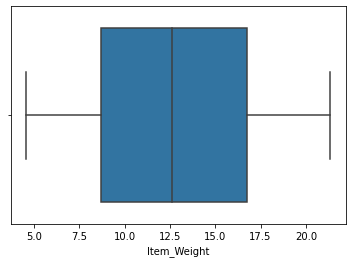

In [652]:
sns.boxplot(df["Item_Weight"])

<font color = "orange">***Intrepretation:*** </font>
***around 80% of the items having below 17***

###<font color="ORANGE"> Analysis of Item fat content feature:

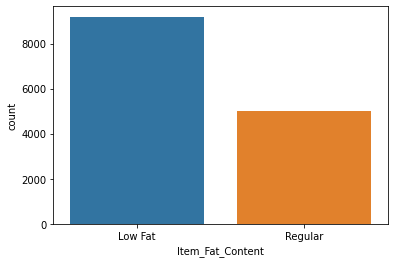

In [653]:
sns.countplot(df["Item_Fat_Content"])

<font color = "orange">***Intrepretation:*** </font>
***most of the items have low fat***

###<font color="ORANGE"> Analysis of Item visibility feature:

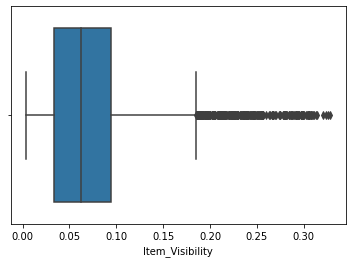

In [654]:
sns.boxplot(df["Item_Visibility"])

***since there are a lot of outliers in visibility feature, am treating the outliers by replacing them with mean***

In [655]:
x = df["Item_Visibility"].mean()
q1 = df["Item_Visibility"].quantile(0.25)
q3 = df["Item_Visibility"].quantile(0.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
print(lf)
print(uf)
print("mean: ", x)

-0.058197302124999996
0.185377986875
mean:  0.07030079341671361


In [656]:
mean = x
y = df[df["Item_Visibility"]>=uf].index
for index in y:
    df.loc[index,"Item_Visibility"] = mean

###<font color="ORANGE"> Analysing again Item weight feature:

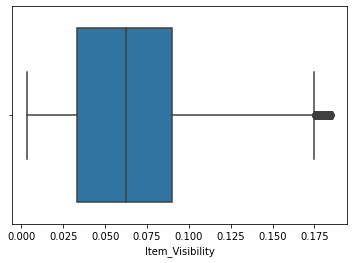

In [657]:
sns.boxplot(df["Item_Visibility"])

<font color = "orange">***Intrepretation:*** </font>
***around 50% of the items are visible to outside from store***

###<font color="ORANGE"> Analysis of Item type feature:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

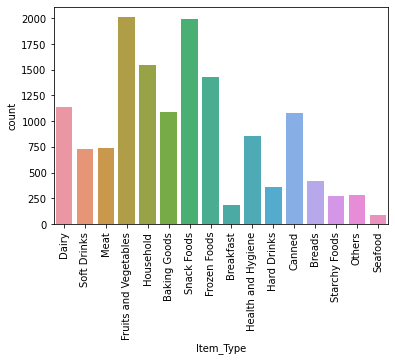

In [658]:
sns.countplot(df["Item_Type"])
plt.xticks(rotation = 90)

<font color = "orange">***Intrepretation:*** </font>
***snack foods, fruits and vegetables are more in the stores***

###<font color="ORANGE"> Analysis of Item MRP feature:

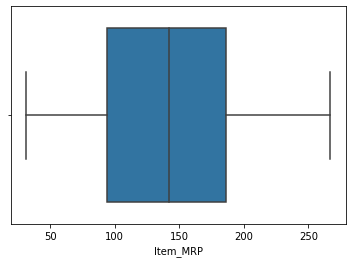

In [659]:
sns.boxplot(df["Item_MRP"])

<font color = "orange">***Intrepretation:*** </font>
***most of the items have MRP less than 200***

###<font color="ORANGE"> Analysis of outlet size feature:

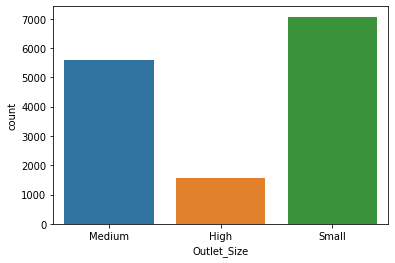

In [660]:
sns.countplot(df["Outlet_Size"])

<font color = "orange">***Intrepretation:*** </font>
***outlets with small size are more and outlets with high size are less***

###<font color="ORANGE"> Analysis of outlet location type feature:

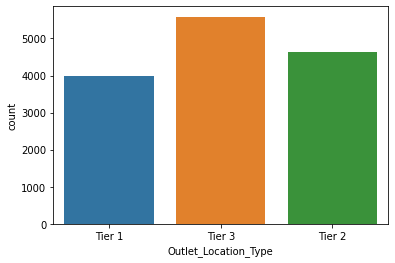

In [661]:
sns.countplot(df["Outlet_Location_Type"])

<font color = "orange">***Intrepretation:*** </font>
***outlets with location type of Tier 3 are more***

###<font color="ORANGE"> Analysis of outlet type feature:

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

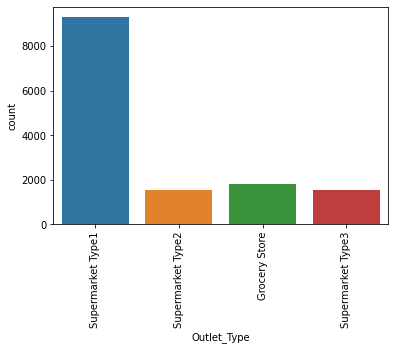

In [662]:
sns.countplot(df["Outlet_Type"])
plt.xticks(rotation = 90)

<font color = "orange">***Intrepretation:*** </font>
***Super market type 1 outlets are more when compared to grocery store and and other super markets***

###<font color="ORANGE"> Analysis of Item outlet sales feature:

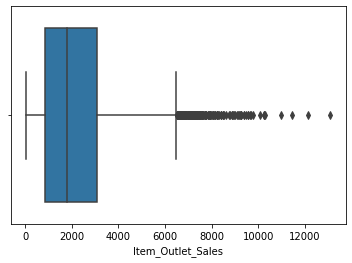

In [663]:
sns.boxplot(df["Item_Outlet_Sales"])

***since there are a lot of outliers in item outlet sales feature, am treating the outliers by replacing them with mean***

In [664]:
x = df["Item_Outlet_Sales"].mean()
q1 = df["Item_Outlet_Sales"].quantile(0.25)
q3 = df["Item_Outlet_Sales"].quantile(0.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
print(lf)
print(uf)
print("mean: ", x)

-2566.3261
6501.8699
mean:  2181.288913575032


In [665]:
mean = x
y = df[df["Item_Outlet_Sales"]>=uf].index
for index in y:
    df.loc[index,"Item_Outlet_Sales"] = mean

###<font color="ORANGE"> Analysing again Item weight feature:

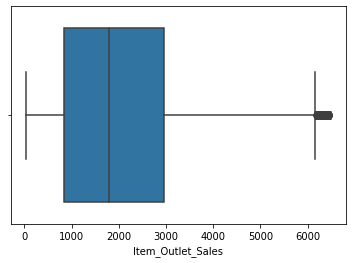

In [666]:
sns.boxplot(df["Item_Outlet_Sales"])

<font color = "orange">***Intrepretation:*** </font>
***around 80 % of the stores have sales less than 5000***

##<font color = "orange">Bivariate analysis:

###<font color="ORANGE"> Analysis of Outlet_Type and Item_Outlet_Sales features:

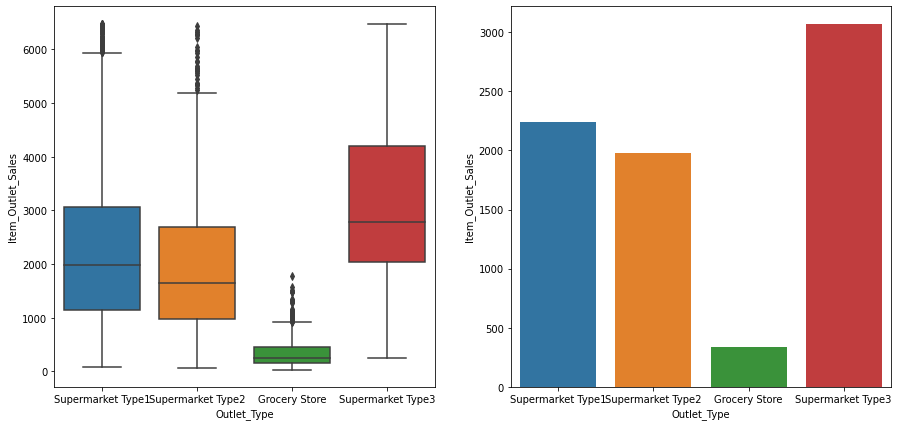

In [667]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(df["Outlet_Type"], df["Item_Outlet_Sales"])

plt.subplot(122)
sns.barplot(df["Outlet_Type"], df["Item_Outlet_Sales"], ci = None)

<font color = "orange">***Intrepretation:*** </font>
***sales are more in the supermarket type 3. So store owners increase their stock in super market type 3 they will get more profits***

###<font color="ORANGE"> Analysis of Outlet_Location_Type and Item_Outlet_Sales features:

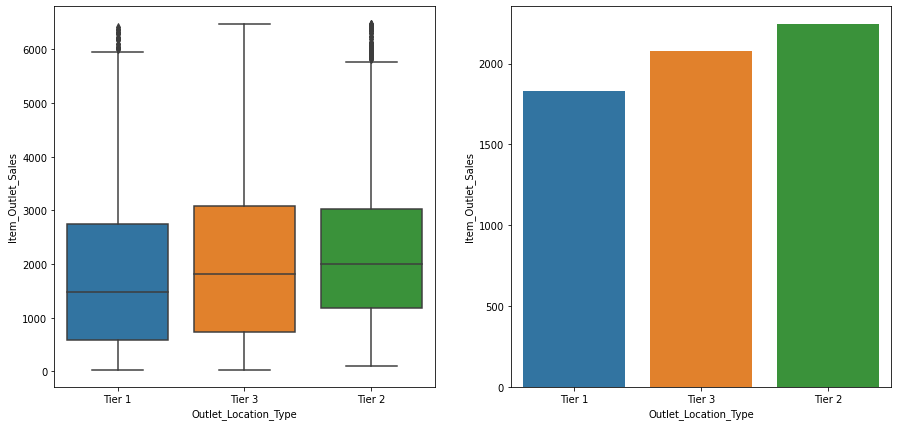

In [668]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(df["Outlet_Location_Type"], df["Item_Outlet_Sales"])

plt.subplot(122)
sns.barplot(df["Outlet_Location_Type"], df["Item_Outlet_Sales"], ci = None)

<font color = "orange">***Intrepretation:*** </font>
***Tier 2 location type outlet has more sales***

###<font color="ORANGE"> Analysis of Outlet_Size and Item_Outlet_Sales features:

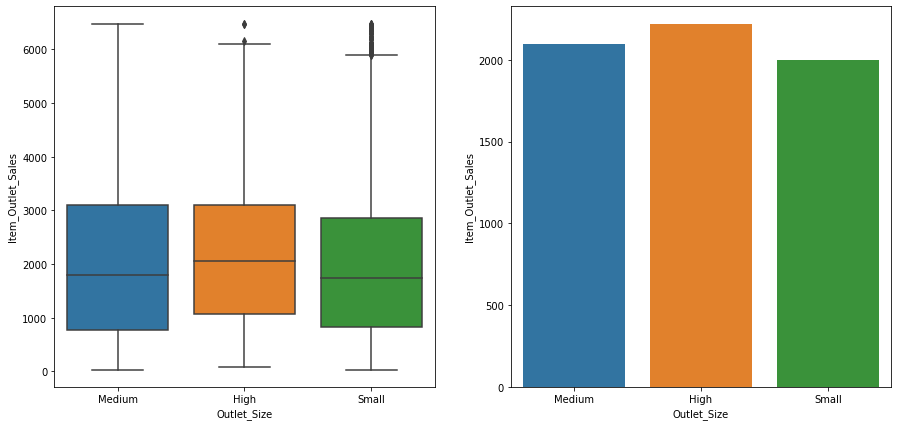

In [669]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(df["Outlet_Size"], df["Item_Outlet_Sales"])

plt.subplot(122)
sns.barplot(df["Outlet_Size"], df["Item_Outlet_Sales"], ci = None)

<font color = "orange">***Intrepretation:*** </font>
***outlets with high size has more sales***

###<font color="ORANGE"> Analysis of Item_Fat_Content and Item_Outlet_Sales features:

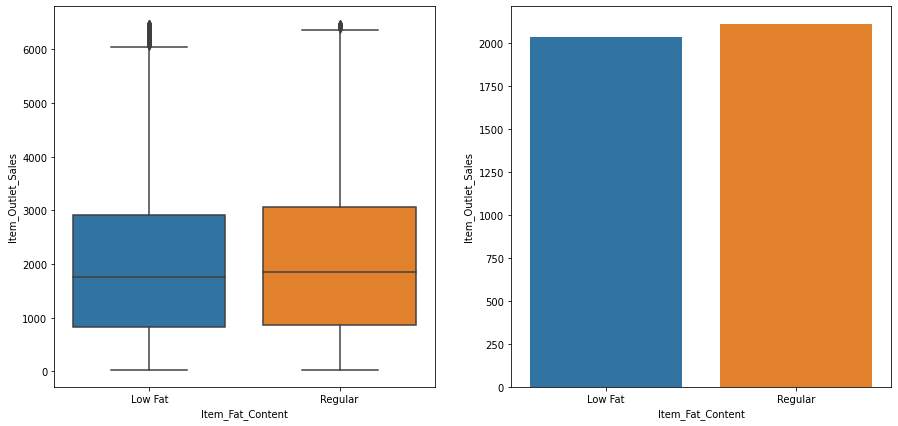

In [670]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(df["Item_Fat_Content"], df["Item_Outlet_Sales"])

plt.subplot(122)
sns.barplot(df["Item_Fat_Content"], df["Item_Outlet_Sales"], ci = None)

<font color = "orange">***Intrepretation:*** </font>
***regular items with fat are sold more when compared to low fat items. So if store owners increase the quantity of regular items, it will be helpful for them to increase the profits***

###<font color="ORANGE"> Analysis of Item_Type and Item_Outlet_Sales features:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

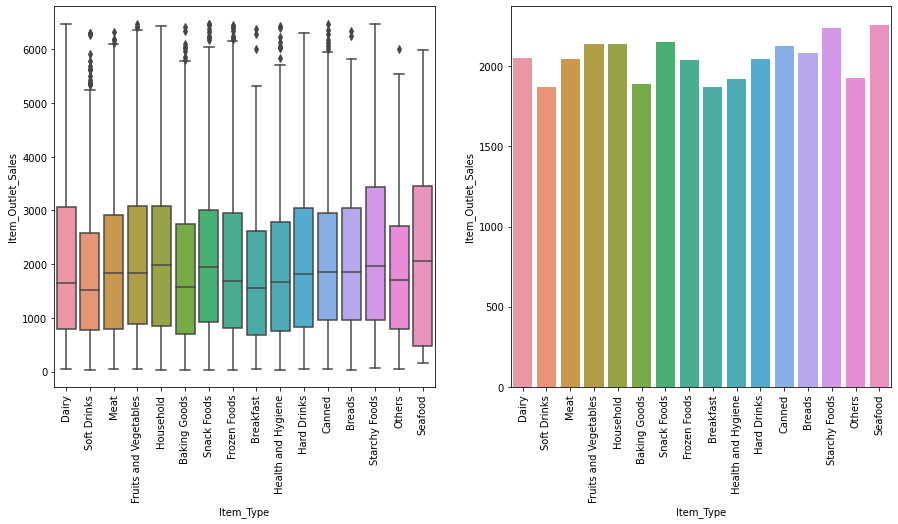

In [671]:
plt.figure(figsize = (15,7))
plt.subplot(121)
sns.boxplot(df["Item_Type"], df["Item_Outlet_Sales"])
plt.xticks(rotation = 90)

plt.subplot(122)
sns.barplot(df["Item_Type"], df["Item_Outlet_Sales"], ci = None)
plt.xticks(rotation = 90)

<font color = "orange">***Intrepretation:*** </font>
***seafoods, starchy foods and snack foods are mostly sold items types***

###<font color="ORANGE"> Analysis of Item_Visibility and Item_Outlet_Sales features:

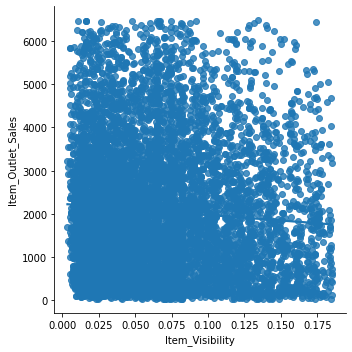

In [672]:
sns.lmplot(x = "Item_Visibility", y = "Item_Outlet_Sales", data = df, ci = None)

<font color = "orange">***Intrepretation:*** </font>
***if the item visibility is high then the sales will be more***

###<font color="ORANGE"> Analysis of Item_Weight and Item_Outlet_Sales features:

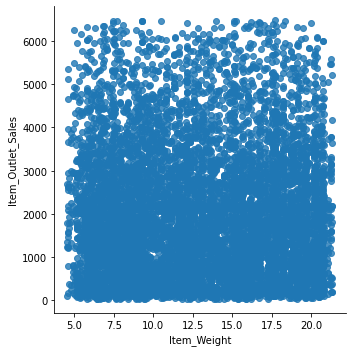

In [673]:
sns.lmplot(x = "Item_Weight", y = "Item_Outlet_Sales", data = df, ci = None)

<font color = "orange">***Intrepretation:*** </font>
***weight of the item has effect on the sales only for few items. From the graph we can see that there is no much effect of item-weight on the sales. In some cases, items with less weight also costs high***

###<font color="ORANGE"> Analysis of Item_MRP and Item_Outlet_Sales features:

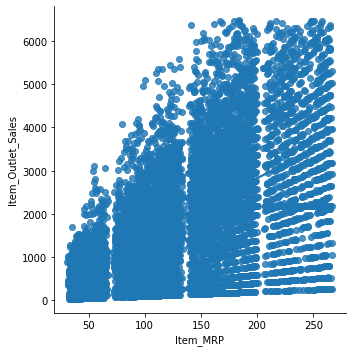

In [674]:
sns.lmplot(x = "Item_MRP", y = "Item_Outlet_Sales", data = df, ci = None)

<font color = "orange">***Intrepretation:*** </font>
***If the MRP inreases the outlet sales also increases***

##<font color = "orange"> Feature Engineering:

###<font color = "orange">converting object type features into categorical type:

In [675]:

df["Item_Fat_Content"] =  df["Item_Fat_Content"].astype("category")
df["Item_Type"] =  df["Item_Type"].astype("category")
df["Outlet_Size"] =  df["Outlet_Size"].astype("category")
df["Outlet_Location_Type"] =  df["Outlet_Location_Type"].astype("category")
df["Outlet_Type"] =  df["Outlet_Type"].astype("category")

In [676]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Weight           14204 non-null  float64 
 1   Item_Fat_Content      14204 non-null  category
 2   Item_Visibility       14204 non-null  float64 
 3   Item_Type             14204 non-null  category
 4   Item_MRP              14204 non-null  float64 
 5   Outlet_Size           14204 non-null  category
 6   Outlet_Location_Type  14204 non-null  category
 7   Outlet_Type           14204 non-null  category
 8   Item_Outlet_Sales     8523 non-null   float64 
dtypes: category(5), float64(4)
memory usage: 514.6 KB


***now no features are of object type***

##<font color = "orange"> Feature Scaling:

###<font color = "orange">converting categorical features to numerical type features:

In [677]:
from sklearn.preprocessing import LabelEncoder

In [678]:
le = LabelEncoder()

df["Item_Fat_Content"] =  le.fit_transform(df["Item_Fat_Content"])

df["Item_Type"] =  le.fit_transform(df["Item_Type"])

df["Outlet_Size"] =  le.fit_transform(df["Outlet_Size"])

df["Outlet_Location_Type"] =  le.fit_transform(df["Outlet_Location_Type"])

df["Outlet_Type"] =  le.fit_transform(df["Outlet_Type"])

In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           14204 non-null  float64
 1   Item_Fat_Content      14204 non-null  int64  
 2   Item_Visibility       14204 non-null  float64
 3   Item_Type             14204 non-null  int64  
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Size           14204 non-null  int64  
 6   Outlet_Location_Type  14204 non-null  int64  
 7   Outlet_Type           14204 non-null  int64  
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 998.8 KB


***now all the features are of numerical type and are ready for further analysis***

##<font color = "orange"> Standardizing the data:

###<font color = "orange">normalizing the data using standard scaler:

In [680]:
from sklearn.preprocessing import StandardScaler

In [681]:
scaler = StandardScaler()

In [682]:
scaled_data = scaler.fit_transform(df)

In [683]:
scaled_df = pd.DataFrame(scaled_data, columns = df.columns)
scaled_df.sample(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
10345,0.624871,1.352792,-1.394141,0.657587,1.046844,0.905347,-1.369286,-0.252702,NaN
12616,1.248319,-0.739212,1.234950,0.894930,-1.363397,-2.055636,1.091566,-0.252702,NaN
5994,-0.666096,-0.739212,0.086114,0.182903,0.292430,-0.575144,1.091566,-1.508171,-0.958774


##<font color = "orange"> plotting correlation heatmap:

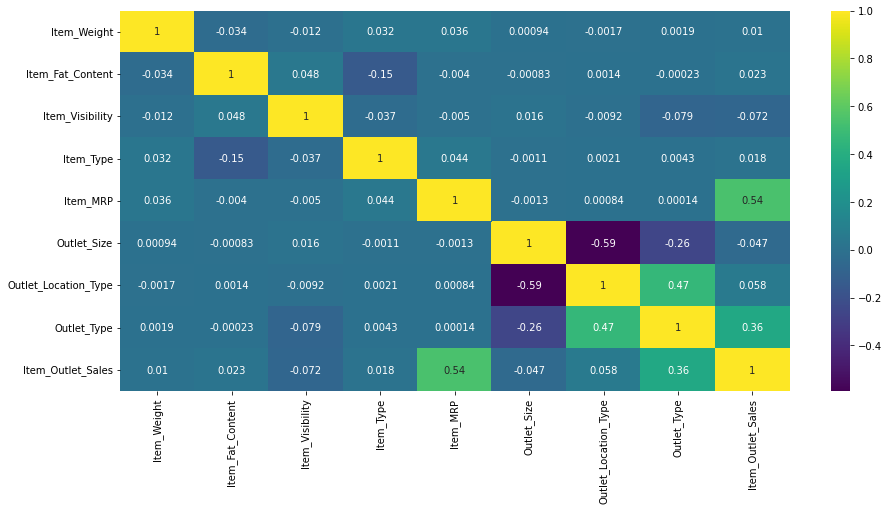

In [684]:
plt.figure(figsize = (15,7))

sns.heatmap(scaled_df.corr(), annot = True, cmap = "viridis")

***from the correlation heatmap, I conclude that target variable (item outlet sales) has good correlation with item MRP and Outlet type features***

## <font color = "orange"> splitting of training and testing data:

###<font color = "orange">taking data with null values in sales column into test dataset so that I can predict the sales values after building the model:

In [685]:
test = df[df["Item_Outlet_Sales"].isna()]
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,20.750,0,0.007565,13,107.8622,1,0,1,NaN
8524,8.300,1,0.038428,4,87.3198,2,1,1,NaN
8525,14.600,0,0.099575,11,241.7538,1,2,0,NaN
8526,7.315,0,0.015388,13,155.0340,2,1,1,NaN
8527,13.600,1,0.118599,4,234.2300,1,2,3,NaN


###<font color = "orange">taking data without null values in sales column into train dataset so that I can use those sales values to build the model:

In [686]:
index1 = df["Item_Outlet_Sales"].dropna().index
index1

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8513, 8514, 8515, 8516, 8517, 8518, 8519, 8520, 8521, 8522],
           dtype='int64', length=8523)

In [687]:
train = pd.DataFrame(df, index = index1)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.074402,6,182.0950,1,2,0,732.3800
4,8.93,0,0.064299,9,53.8614,0,2,1,994.7052


In [688]:
x_train = np.array(train[['Item_MRP','Item_Visibility','Outlet_Type']]).reshape((-1,3))
y_train = np.array(train["Item_Outlet_Sales"])

x_test = np.array(test[['Item_MRP','Item_Visibility','Outlet_Type']]).reshape((-1,3))
y_test = np.array(test["Item_Outlet_Sales"])

## <font color = "orange"> Multiple Linear Regression Model:

###<font color = "orange">building the model:

In [689]:
from sklearn.linear_model  import LinearRegression

In [690]:
LR_model = LinearRegression()

###<font color = "orange">fitting train data to the model:

In [691]:
a = LR_model.fit(x_train, y_train)

###<font color = "orange">calculating the score of the model:

In [692]:
LR_score = a.score(x_train,y_train)
LR_score

0.42873650809713704

### <font color = "orange">predicting the train values:

In [693]:
LR_predicted_train_y = LR_model.predict(x_train)

###<font color = "orange">finding MSE and RMSE with predicted and actual train values:

In [694]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [695]:
LR_MSE = mean_squared_error(y_train, LR_predicted_train_y)
print(f'MSE for multiple linear regression model: {LR_MSE}')
LR_RMSE = mean_squared_error(y_train, LR_predicted_train_y,  squared = False)
print(f'MSE for multiple linear regression model: {LR_RMSE}')

MSE for multiple linear regression model: 1267568.039220981
MSE for multiple linear regression model: 1125.86324179315


###<font color = "orange"> predicting the test values:

In [696]:
LR_predicted_test_y = LR_model.predict(x_test)

## <font color = "orange"> bagging with random forest:

###<font color = "orange">building the model:

In [697]:
from sklearn.ensemble import RandomForestRegressor

In [698]:
RF_model = RandomForestRegressor()

###<font color = "orange">fitting train data to the model:

In [699]:
b = RF_model.fit(x_train,y_train)

###<font color = "orange">calculating the score of the model:

In [700]:
bagging_score = b.score(x_train,y_train)
bagging_score

0.9256997785132306

###<font color = "orange"> predicting the train values:

In [701]:
RF_predicted_train_y = RF_model.predict(x_train)

###<font color = "orange">finding MSE and RMSE with predicted and actual train values:

In [702]:
RF_MSE = mean_squared_error(y_train, RF_predicted_train_y)
print(f'MSE for bagging model: {RF_MSE}')
RF_RMSE = mean_squared_error(y_train, RF_predicted_train_y,  squared = False)
print(f'MSE for bagging model: {RF_RMSE}')

MSE for bagging model: 164863.65293527854
MSE for bagging model: 406.03405391084937


### <font color = "orange">predicting the test values:

In [703]:
RF_predicted_test_y = RF_model.predict(x_test)

## <font color = "orange"> boosting with adaboost:

###<font color = "orange">building the model:

In [704]:
from sklearn.ensemble import AdaBoostRegressor

In [705]:
ADA_model = AdaBoostRegressor()

###<font color = "orange">fitting train data to the model:

In [706]:
c = ADA_model.fit(x_train,y_train)

###<font color = "orange">calculating the score of the model:

In [707]:
boosting_score = c.score(x_train,y_train)
boosting_score

0.5436181429125699

###<font color = "orange"> predicting the train values:

In [708]:
ADA_predicted_train_y = ADA_model.predict(x_train)

###<font color = "orange">finding MSE and RMSE with predicted and actual train values:

In [709]:
ADA_MSE = mean_squared_error(y_train, ADA_predicted_train_y)
print(f'MSE for adaboost model: {ADA_MSE}')
ADA_RMSE = mean_squared_error(y_train, ADA_predicted_train_y,  squared = False)
print(f'MSE for adaboost model: {ADA_RMSE}')

MSE for adaboost model: 1012658.8937048869
MSE for adaboost model: 1006.3095416942477


###<font color = "orange"> predicting the test values:

In [710]:
ADA_predicted_test_y = ADA_model.predict(x_test)

## <font color = "orange"> Decision Tree Regressor:

###<font color = "orange">building the model:

In [711]:
from sklearn.tree import DecisionTreeRegressor

In [712]:
DT_model = DecisionTreeRegressor()

###<font color = "orange">fitting train data to the model:

In [713]:
d = DT_model.fit(x_train,y_train)

###<font color = "orange">calculating the score of the model:

In [714]:
DT_score = d.score(x_train,y_train)
DT_score

0.9999991007305793

###<font color = "orange"> predicting the train values:

In [715]:
DT_predicted_train_y = DT_model.predict(x_train)

###<font color = "orange">finding MSE and RMSE with predicted and actual train values:

In [716]:
DT_MSE = mean_squared_error(y_train, DT_predicted_train_y)
print(f'MSE for adaboost model: {DT_MSE}')
DT_RMSE = mean_squared_error(y_train, DT_predicted_train_y,  squared = False)
print(f'MSE for adaboost model: {DT_RMSE}')

MSE for adaboost model: 1.9953755008541596
MSE for adaboost model: 1.412577608789747


###<font color = "orange"> predicting the test values:

In [717]:
ADA_predicted_test_y = ADA_model.predict(x_test)

## <font color = "orange"> stacking model:

###<font color = "orange">building the model:

In [718]:
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [719]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
  level0 = list()
  level0.append(('lr', LinearRegression()))
  level0.append(('knn', KNeighborsRegressor()))
  level0.append(('cart', DecisionTreeRegressor()))
  level0.append(('svm', SVR()))
# define meta learner model
  level1 = LinearRegression()
# define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

In [720]:
STACK_model = get_stacking()

###<font color = "orange">fitting train data to the model:

In [721]:
e = STACK_model.fit(x_train,y_train)

###<font color = "orange">calculating the score of the model:

In [722]:
stacking_score = e.score(x_train, y_train)
stacking_score

0.6498158866315964

###<font color = "orange"> predicting the train values:

In [723]:
stack_predicted_train_y = STACK_model.predict(x_train)

###<font color = "orange">finding MSE and RMSE with predicted and actual train values:

In [724]:
STACK_MSE = mean_squared_error(y_train, stack_predicted_train_y)
print(f'MSE for stacking model: {STACK_MSE}')
STACK_RMSE = mean_squared_error(y_train, stack_predicted_train_y,  squared = False)
print(f'RMSE for stacking model: {STACK_RMSE}')

MSE for stacking model: 777018.3045833469
RMSE for stacking model: 881.4864176964651


### <font color = "orange">predicting the test values:

In [725]:
stack_predicted_test_y = STACK_model.predict(x_test)
stack_predicted_test_y

array([1284.54453784, 1021.91901179, 1305.91845732, ..., 1720.85110017,
       2909.61079797, 1343.83282886])

###<font color = "orange">comparing the scores of all the built models to find which gives better prediction for the dataset:

In [726]:
scores = []
scores.append(round(LR_score,3))
scores.append(round(bagging_score,3))
scores.append(round(boosting_score,3))
scores.append(round(DT_score,3))
scores.append(round(stacking_score,3))


names = []
names.append("Linear Regression")
names.append("bagging")
names.append("Boosting")
names.append("Decision Tree")
names.append("Stacking")

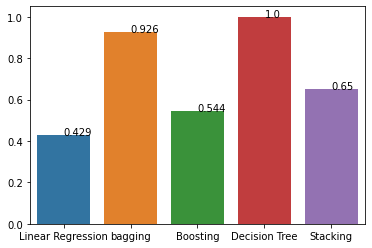

In [727]:
def addlabels(names,scores):
  for i in range(len(names)):
    plt.text(i,scores[i],scores[i])

if __name__ == '__main__':
  sns.barplot(names, scores)
  addlabels(names, scores)
  plt.show()

***from the bar graph, I conclude that Decision Tree model will give best prediction for the given dataset***

###<font color = "orange">Plotting actual vs predicted values using Decision Tree model:

In [728]:
y_train_pred = DT_model.predict(x_train)

df_pred_train = pd.DataFrame({"Actual":y_train,"predicted":y_train_pred})
df_pred_train.sample(10, random_state = 1)

,Actual,predicted
1070,952.7598,952.7598
6305,1133.8574,1133.8574
8504,4138.6128,4138.6128
5562,1657.1762,1657.1762
1410,679.1160,679.1160
695,2488.7604,2488.7604
2909,905.4880,905.4880
3470,3187.8504,3187.8504
4900,3439.5228,3439.5228
5879,4595.3516,4595.3516


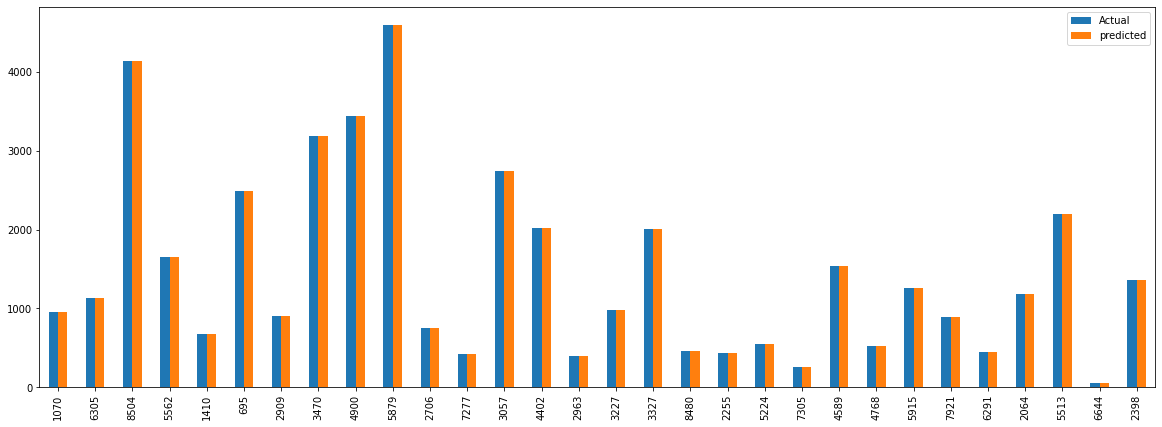

In [729]:
df1 = df_pred_train.sample(30, random_state = 1)
df1.plot(kind = "bar", figsize = (20,7))
plt.show()

***from the above bar graph, I conclude that the prediction is accurate with Decision Tree model. Because the predicted and actual values are nearly equal***